<h2>Question-23</h2>
Use 
sklearn.datasets.load_breast_cancer
And Yellowbrick
Show confusion matrix and ROCAUC 
using Logistic regression 


#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
#check wdbc.data or check  breast_cancer.csv , but use load_breast_cancer() 
#Diagnosis (M = malignant,1, B = benign,0) 
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# all necessary imports
from sklearn.pipeline import *  
from sklearn.datasets import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *    
from sklearn.linear_model import *   
from sklearn.model_selection import *  
from sklearn.preprocessing import *  
from yellowbrick.classifier import *
 

In [10]:
# loading the dataset
breast_cancer = load_breast_cancer()
X,y = breast_cancer.data, breast_cancer.target

In [12]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [13]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
X.shape, y.shape

((569, 30), (569,))

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Model is linear regression
lr = LogisticRegression(max_iter=10000)


In [32]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [35]:
lr.score(X_train, y_train) #r^2  train accuracy

0.9604395604395605

In [36]:
lr.score(X_test, y_test) # test accuracy

0.9649122807017544

C:\Users\Bhavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.9649122807017544

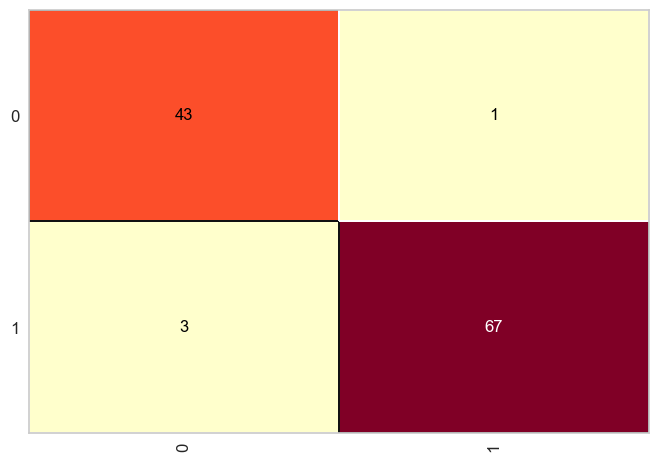

In [60]:
cm = ConfusionMatrix(lr) # confusion matrix
cm.score(X_test, y_test)

0.996709816157868

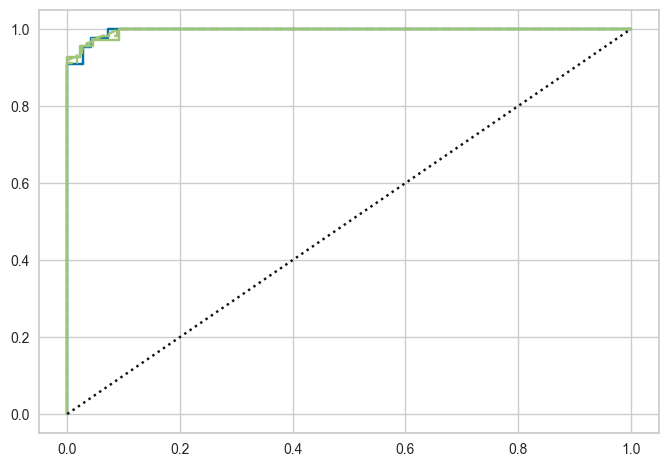

In [65]:
auc_roc = ROCAUC(lr)   #auc-roc
auc_roc.fit(X_train, y_train)
auc_roc.score(X_test, y_test)

<h2> B. </h2>
Use data/breast_cancer.csv
Use LabelEncoder and MinMaxScalar and Use pipeline 
Then GridSearch on param_grid = dict(lr__C=[0.1, 1, 10])
using Logistic regression 

In [77]:
# Loading dataset
breastcancer = pd.read_csv('code/data/breast_cancer.csv', header=None)  # there are no column names

In [83]:
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
# Manually setting the column names
columns = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
breastcancer.columns = columns

In [80]:
breastcancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [82]:
# label encoding
le = LabelEncoder()
breastcancer['diagnosis'] = le.fit_transform(breastcancer['diagnosis'])

In [84]:
X = breastcancer.drop('diagnosis', axis=1)
y = breastcancer['diagnosis']

In [85]:
X.shape, y.shape

((569, 31), (569,))

In [86]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
lo_r = LogisticRegression(max_iter=10000)
lo_r.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [92]:
# Pipeline
pipeline = Pipeline([('scaler', MinMaxScaler()),('lr', lo_r)])

In [93]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lr', LogisticRegression(max_iter=10000))])

In [94]:
# grid search
params = dict(lr__C = [0.1, 1, 10])
grid = GridSearchCV(pipeline, params, cv=5)       #dict(lr__C = [0.1, 1, 100], cf__pca__n_components=[1,2])
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'lr__C': [0.1, 1, 10]})

In [114]:
best_model = grid.best_estimator_

In [115]:
best_model.score(X_train, y_train)  #accuracy -> 1 is best

0.9868131868131869

In [116]:
best_model.score(X_test, y_test) #accuracy-> 1 is the best

0.9736842105263158

In [117]:
grid.best_params_

{'lr__C': 10}

In [118]:
print(best_model)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lr', LogisticRegression(C=10, max_iter=10000))])
